<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/demos/algorithms/KNN_Fruits.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Demo: K-Nearest Neighbors - Classify Fruits

## Package setup

In [1]:
# The mlkatas package contains various utility functions required by all katas
!pip install mlkatas

In [2]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [4]:
# Import ML packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Step 1: Loading the data

In [5]:
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt -O fruit_data_with_colors.txt

--2019-10-06 23:17:27--  http://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt
Résolution de www.eyrignoux.com.fr (www.eyrignoux.com.fr)… 62.210.16.62
Connexion à www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:80… connecté.
requête HTTP transmise, en attente de la réponse… 301 Moved Permanently
Emplacement : https://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt [suivant]
--2019-10-06 23:17:27--  https://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt
Connexion à www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 2370 (2,3K) [text/plain]
Sauvegarde en : « fruit_data_with_colors.txt »

fruit_data_with_col 100%[===================>]   2,31K  --.-KB/s    in 0s      

2019-10-06 23:17:27 (98,3 MB/s) — « fruit_data_with_colors.txt » sauvegardé [2370/2370]



In [6]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.sample(n=10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
51,4,lemon,unknown,116,6.0,7.5,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
33,3,orange,turkey_navel,190,7.5,8.1,0.74
28,3,orange,selected_seconds,140,6.7,7.1,0.72
15,1,apple,golden_delicious,156,7.7,7.1,0.69
31,3,orange,selected_seconds,210,7.8,8.0,0.82
12,1,apple,braeburn,154,7.0,7.1,0.88
23,1,apple,cripps_pink,170,7.6,7.9,0.88
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72
37,3,orange,turkey_navel,154,7.3,7.3,0.79


## Step 2: Preparing the data

In [7]:
# Evaluate class distribution
samples_count = fruits.size
for name in fruits['fruit_name'].unique():
    class_percent = fruits[fruits.fruit_name == name].size / samples_count
    print(f'{name}s : {class_percent * 100:.1f}%')

apples : 32.2%
mandarins : 8.5%
oranges : 32.2%
lemons : 27.1%


In [8]:
# For this example, we use the mass, width, and height features of each fruit instance
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

print(f'x: {x.shape}. y: {y.shape}')

x: (59, 3). y: (59,)


In [9]:
# Split data between training and test sets with a 80/20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

x_train: (47, 3). y_train: (47,)
x_test: (12, 3). y_test: (12,)


In [10]:
# Standardize data
scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Step 3: Creating a classifier

In [11]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Step 4: Evaluating the classifier

In [12]:
# Compute accuracy on training and test sets
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print(f'Training accuracy: {train_acc * 100:.2f}%')
print(f'Test accuracy: {test_acc * 100:.2f}%')

Training accuracy: 89.36%
Test accuracy: 83.33%


## Step 5 - Using the classifier for predictions

In [13]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [14]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = model.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

In [15]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = model.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

## Step 6: Tuning the classifier

### Importance of the `k` parameter

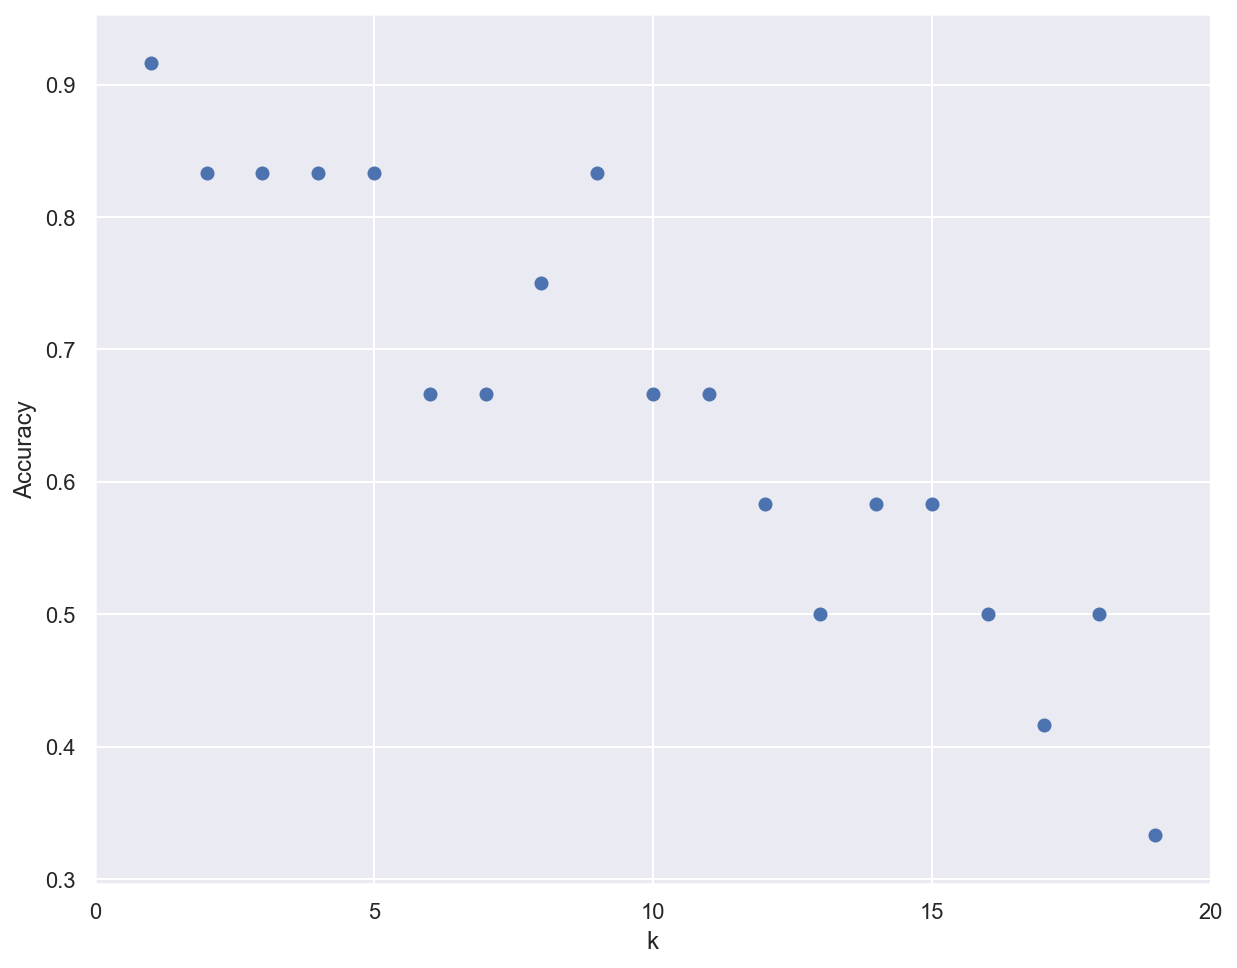

In [16]:
k_range = range(1,20)
scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### Importance of the training/test sets proportions

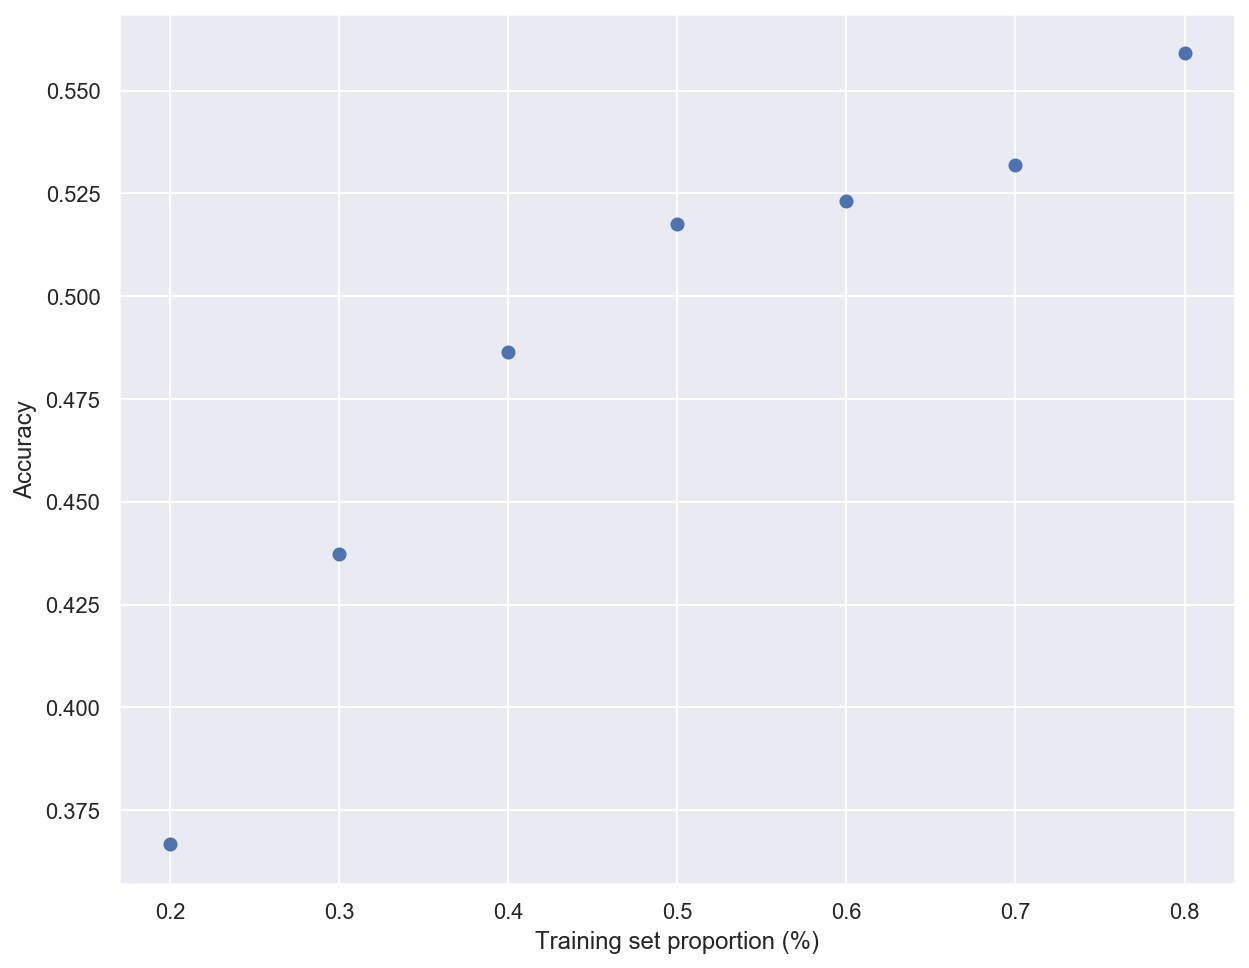

In [17]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

model = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1-s)
        model.fit(x_train, y_train)
        scores.append(model.score(x_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy');

## TODO

- Better loking graphs: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/